In [56]:
import warnings 
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [30]:
from scripts.data_read import read_data
from scripts.normalization import normalize_data

In [3]:
df = read_data("../data/cleaned_data.xlsx")

In [4]:
df =  df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,86399.000000,2.082014e+14,33664962239,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,86399.000000,2.082019e+14,33681854413,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,86399.000000,2.082003e+14,33760627129,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,86399.000000,2.082014e+14,33750343200,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,86399.000000,2.082014e+14,33699795932,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230.000000,2.082015e+14,33650688697,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970.000000,2.082019e+14,33663449963,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283,2019-04-30 10:46:12,810,98249.000000,2.082017e+14,33621890103,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696,2019-04-30 10:40:34,327,97910.000000,2.082015e+14,33619622058,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096,371895920.0


In [6]:
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  int64         
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  int64         
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  int64         
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

# data_aggregation

In [7]:
#slicing the useful column
df_engag_metrics = df.iloc[:,np.r_[0,5,7,43:45]]

In [8]:
#create column of the total data 
df_engag_metrics['total'] = df_engag_metrics['Total UL (Bytes)'] + df_engag_metrics['Total DL (Bytes)']

In [9]:
df_engag_metrics.head()

,Bearer Id,Dur. (ms),MSISDN/Number,Total UL (Bytes),Total DL (Bytes),total
0,13114483460844900352,86399.0,33664962239,36749741,308879636.0,345629377.0
1,13114483482878900224,86399.0,33681854413,53800391,653384965.0,707185356.0
2,13114483484080500736,86399.0,33760627129,27883638,279807335.0,307690973.0
3,13114483485442799616,86399.0,33750343200,43324218,846028530.0,889352748.0
4,13114483499480700928,86399.0,33699795932,38542814,569138589.0,607681403.0


###### aggregate by the session frequency

In [10]:
df_engag_metrics.iloc[:,np.r_[0,2]].groupby('MSISDN/Number').agg({'Bearer Id':'count'}).reset_index().sort_values(by='Bearer Id',ascending=False).head(10).reset_index().drop('index',axis=1)

,MSISDN/Number,Bearer Id
0,33663797508,7501
1,33626320676,18
2,33614892860,17
3,33625779332,17
4,33659725664,16
5,33760536639,15
6,33675877202,15
7,33667163239,13
8,33760413819,12
9,33627080969,12


###### aggregation by duration of session

In [11]:
df_engag_metrics.iloc[:,np.r_[2,5]].groupby('MSISDN/Number').agg({'total':'sum'}).reset_index().sort_values(by='total',ascending=False).head(10).reset_index().drop('index',axis=1)

,MSISDN/Number,total
0,33663797508,3.700910e+12
1,33614892860,8.826326e+09
2,33760536639,8.495067e+09
3,33625779332,8.474657e+09
4,33626320676,7.951348e+09
5,33675877202,7.891111e+09
6,33659725664,7.680848e+09
7,33666464084,7.308501e+09
8,33760413819,7.112835e+09
9,33664712899,6.852224e+09


###### aggregation by total data 

In [12]:
df_engag_metrics.iloc[:,np.r_[1,2]].groupby('MSISDN/Number').agg({'Dur. (ms)':'sum'}).reset_index().sort_values(by='Dur. (ms)',ascending=False).head(10).reset_index().drop('index',axis=1)

,MSISDN/Number,Dur. (ms)
0,33663797508,6.491735e+08
1,33659725664,1.905478e+06
2,33626320676,1.785419e+06
3,33659359429,1.747994e+06
4,33675877202,1.745131e+06
5,33614892860,1.678397e+06
6,33760536639,1.651084e+06
7,33625779332,1.599052e+06
8,33664712899,1.334982e+06
9,33606582008,1.322251e+06


In [31]:
# engagement metrics 
df3 = df_engag_metrics.iloc[:,np.r_[0,1,2,5]]

In [50]:
df4 = df3.groupby('MSISDN/Number').agg({'Bearer Id':'count','Dur. (ms)':'sum','total':'sum'})
df4['total(megabytes)'] = df4['total'] / 1000000
df4.drop('total',axis=1,inplace=True)

In [55]:
df4.head()

,Bearer Id,Dur. (ms),total(megabytes)
MSISDN/Number,,,
33601001722,1,116720.0,878.690574
33601001754,1,181230.0,156.859643
33601002511,1,134969.0,595.966483
33601007832,1,49878.0,422.320698
33601008617,2,37104.0,1457.410944


In [51]:
#normalize 
normalized_data = normalize_data(df4).normalizer(df4)

In [52]:
df_norm = pd.DataFrame(normalized_data)

In [53]:
df_norm.rename(columns={0:'sessions frequency',1:'the duration of the session',2:' total traffic'},inplace=True)

In [54]:
df_norm

,sessions frequency,the duration of the session,total traffic
0,0.000009,0.999972,0.007528
1,0.000006,1.000000,0.000866
2,0.000007,0.999990,0.004416
3,0.000020,0.999964,0.008467
4,0.000054,0.999229,0.039249
...,...,...,...
102095,0.000009,0.999973,0.007404
102096,0.000015,0.999959,0.009033
102097,0.000013,0.999941,0.010900
102098,0.000005,0.999996,0.002928


# clustering 

In [57]:
#find clusters 
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data)

In [65]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

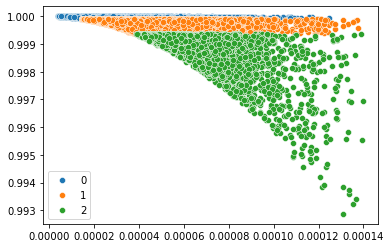

In [69]:
labels = np.unique(kmeans.labels_)
 
#plotting the results of clusters:
 
for i in labels:
    sns.scatterplot(normalized_data[kmeans.labels_ == i , 0] , normalized_data[kmeans.labels_ == i , 1] , label = i)
plt.legend()

plt.show()

##### quantitative statistics for each cluster

In [71]:
#add clusters to non-mormalized values
df4['clusters'] = kmeans.labels_

In [72]:
df4.head()

,Bearer Id,Dur. (ms),total(megabytes),clusters
MSISDN/Number,,,,
33601001722,1,116720.0,878.690574,0
33601001754,1,181230.0,156.859643,0
33601002511,1,134969.0,595.966483,0
33601007832,1,49878.0,422.320698,0
33601008617,2,37104.0,1457.410944,2


#### cluster 1 

In [73]:
df_cluster1 = df4[df4['clusters']==0]

In [75]:
df_cluster1.describe().iloc[:,:-1]

,Bearer Id,Dur. (ms),total(megabytes)
count,86436.000000,8.643600e+04,8.643600e+04
mean,1.512090,1.527986e+05,7.204727e+02
std,25.523064,2.209852e+06,1.259634e+04
min,1.000000,8.034000e+03,3.324901e+01
25%,1.000000,8.639900e+04,3.230528e+02
50%,1.000000,1.161050e+05,5.875515e+02
75%,2.000000,1.729862e+05,8.498935e+02
max,7501.000000,6.491735e+08,3.700910e+06


##### cluster2

In [77]:
df_cluster2 = df4[df4['clusters']==1]
df_cluster2.describe().iloc[:,:-1]

,Bearer Id,Dur. (ms),total(megabytes)
count,12720.000000,12720.000000,12720.000000
mean,1.260377,38576.438365,752.277726
std,0.488216,22049.608214,348.507754
min,1.000000,7267.000000,111.644471
25%,1.000000,24309.750000,516.283919
50%,1.000000,32692.500000,708.077309
75%,1.000000,47697.750000,880.181859
max,7.000000,265806.000000,4009.943326


###### cluster 3 

In [78]:
df_cluster3 = df4[df4['clusters']==2]
df_cluster3.describe().iloc[:,:-1]

,Bearer Id,Dur. (ms),total(megabytes)
count,2944.000000,2944.000000,2944.000000
mean,1.110734,16847.994226,798.875469
std,0.317087,6615.136295,246.603930
min,1.000000,7142.000000,259.536159
25%,1.000000,12495.500000,654.448887
50%,1.000000,15347.500000,777.800386
75%,1.000000,19410.250000,871.476332
max,3.000000,50262.000000,1895.710967


#### engaged user per applications 

In [80]:
for i,j in enumerate(df.columns):
    print(i,j)

0 Bearer Id
1 Start
2 Start ms
3 End
4 End ms
5 Dur. (ms)
6 IMSI
7 MSISDN/Number
8 IMEI
9 Last Location Name
10 Avg RTT DL (ms)
11 Avg RTT UL (ms)
12 Avg Bearer TP DL (kbps)
13 Avg Bearer TP UL (kbps)
14 DL TP < 50 Kbps (%)
15 50 Kbps < DL TP < 250 Kbps (%)
16 250 Kbps < DL TP < 1 Mbps (%)
17 DL TP > 1 Mbps (%)
18 UL TP < 10 Kbps (%)
19 10 Kbps < UL TP < 50 Kbps (%)
20 50 Kbps < UL TP < 300 Kbps (%)
21 UL TP > 300 Kbps (%)
22 Activity Duration DL (ms)
23 Activity Duration UL (ms)
24 Dur. (ms).1
25 Handset Manufacturer
26 Handset Type
27 Nb of sec with Vol DL < 6250B
28 Nb of sec with Vol UL < 1250B
29 Social Media DL (Bytes)
30 Social Media UL (Bytes)
31 Google DL (Bytes)
32 Google UL (Bytes)
33 Email DL (Bytes)
34 Email UL (Bytes)
35 Youtube DL (Bytes)
36 Youtube UL (Bytes)
37 Netflix DL (Bytes)
38 Netflix UL (Bytes)
39 Gaming DL (Bytes)
40 Gaming UL (Bytes)
41 Other DL (Bytes)
42 Other UL (Bytes)
43 Total UL (Bytes)
44 Total DL (Bytes)


In [81]:
df_applications = df.iloc[:,np.r_[7,29:41]]

In [82]:
df_applications

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
0,33664962239,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07
1,33681854413,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06
2,33760627129,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05
3,33750343200,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07
4,33699795932,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,33650688697,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06
149997,33663449963,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06
149998,33621890103,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07
149999,33619622058,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06


In [95]:
df_applications['Social Media data'] = df_applications['Social Media DL (Bytes)'] + df_applications['Social Media UL (Bytes)']
df_applications['Google  data'] = df_applications['Google DL (Bytes)'] + df_applications['Google UL (Bytes)']
df_applications['Email  data'] = df_applications['Email DL (Bytes)'] + df_applications['Email UL (Bytes)']
df_applications['Youtube  data'] = df_applications['Youtube DL (Bytes)'] + df_applications['Youtube UL (Bytes)']
df_applications['Netflix  data'] = df_applications['Netflix DL (Bytes)'] + df_applications['Netflix UL (Bytes)']
df_applications['Gaming  data'] = df_applications['Gaming DL (Bytes)'] + df_applications['Gaming UL (Bytes)']


In [96]:
df_applications_ = df_applications.iloc[:,np.r_[0,13:19]]

In [97]:
df_applications_

,MSISDN/Number,Social Media data,Google data,Email data,Youtube data,Netflix data,Gaming data
0,33664962239,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08
1,33681854413,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08
2,33760627129,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08
3,33750343200,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08
4,33699795932,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08
...,...,...,...,...,...,...,...
149996,33650688697,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08
149997,33663449963,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08
149998,33621890103,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08
149999,33619622058,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08


##### top 10 most engaged for each column

In [106]:
for i,j in zip(np.arange(1,7).tolist(),df_applications_.iloc[:,1:].columns):
    print(df_applications_.iloc[:,np.r_[0,i]].groupby('MSISDN/Number').agg({j:'sum'}).reset_index().sort_values(by=j,ascending=False).head(10).reset_index().drop('index',axis=1))
    print('*'*50)

   MSISDN/Number  Social Media data
0    33663797508       1.366651e+10
1    33626320676       4.337478e+07
2    33760536639       3.978319e+07
3    33659725664       3.541236e+07
4    33614892860       2.829454e+07
5    33625779332       2.713550e+07
6    33667163239       2.424785e+07
7    33669068942       2.380083e+07
8    33603127838       2.307782e+07
9    33658490784       2.300007e+07
**************************************************
   MSISDN/Number  Google  data
0    33663797508  5.888092e+10
1    33626320676  1.521919e+08
2    33625779332  1.423079e+08
3    33614892860  1.279738e+08
4    33760536639  1.232231e+08
5    33659725664  1.165163e+08
6    33675877202  1.098605e+08
7    33667163239  1.050327e+08
8    33761268199  9.708999e+07
9    33698756430  9.193515e+07
**************************************************
   MSISDN/Number   Email  data
0    33663797508  1.692518e+10
1    33626320676  4.241878e+07
2    33614892860  4.078863e+07
3    33625779332  4.063397e+07
4    3

#### top 3 most used applications

In [115]:
df_most = pd.DataFrame(df_applications_.describe().iloc[1,1:])

In [118]:
df_most.sort_values('mean',ascending=False).head()

,mean
Gaming data,4.303331e+08
Youtube data,2.264348e+07
Netflix data,2.262861e+07
Google data,7.807295e+06
Email data,2.259102e+06
Social Media data,1.828250e+06
